In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the dataset
df = pd.read_csv('dataset/spam.csv', encoding='latin-1')

# Display the first few rows
print(df.head())

print(df.columns)


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [3]:
df = df[['v1', 'v2']]
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)


Data Preprocessing

label      0
message    0
dtype: int64


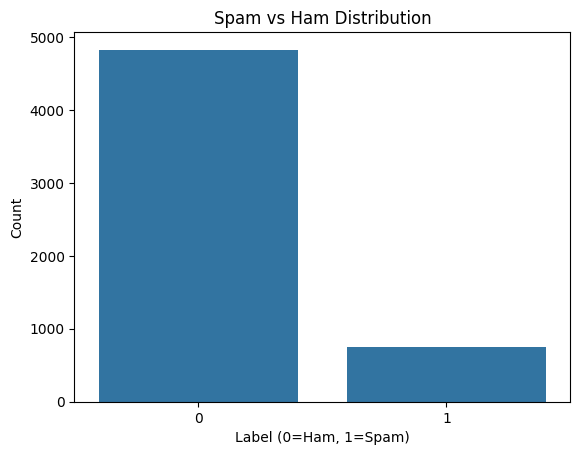

In [4]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

print(df.isnull().sum())  # Should return zero missing values

sns.countplot(x=df['label'])
plt.title("Spam vs Ham Distribution")
plt.xlabel("Label (0=Ham, 1=Spam)")
plt.ylabel("Count")
plt.show()


Text Processing (Tokenization & Stopword Removal)

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenization
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  # Remove stopwords and non-alphanumeric words
    return " ".join(filtered_tokens)

df['cleaned_message'] = df['message'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prave/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\prave/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prave/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [7]:
vectorizer = TfidfVectorizer(max_features=3000)  # Convert text to TF-IDF vectors
X = vectorizer.fit_transform(df['cleaned_message']).toarray()
y = df['label']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Train the Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)


Accuracy: 0.9767
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



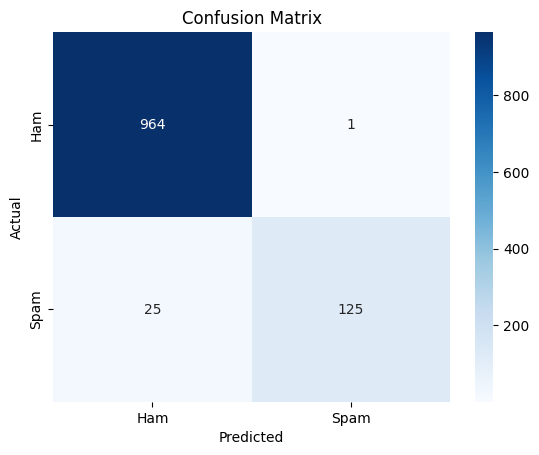

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


 Test with a Custom SMS Message

In [11]:
def predict_spam(text):
    processed_text = preprocess_text(text)
    vectorized_text = vectorizer.transform([processed_text]).toarray()
    prediction = model.predict(vectorized_text)
    return "Spam" if prediction[0] == 1 else "Ham"

# Test Messages
print(predict_spam("Congratulations! You've won a free iPhone. Click here to claim."))
print(predict_spam("Hey, are we still meeting at 3 PM today?"))

Spam
Ham
